## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [69]:
# Import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [70]:
# Read the csv file
adult = pd.read_csv('adult.csv')

In [71]:
# Overview of dataset
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [72]:
# Display the data
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


I notice that some of the cells are "?". This will be a problem when I begin my data analysis. Hence, the beginning of data processing starts here.

In [73]:
# Convert each "?" to NaN. Check which of the cells are empty
adult.replace('?', np.NaN, inplace = True)
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [74]:
# Check the overview again.
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [75]:
#Give the emtpy cells in each of the three columns a value.
adult.fillna(adult['workclass'].mode()[0], inplace = True)
adult.fillna(adult['occupation'].mode()[0], inplace = True)
adult.fillna(adult['native.country'].mode()[0], inplace = True)

In [76]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can tell that the data has been tidied. The range index equals the non-null count. We can proceed with the data visualization process.

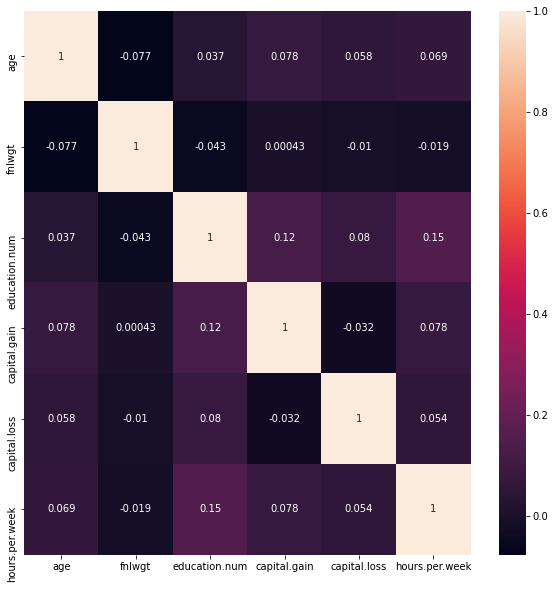

In [77]:
# Check the correlation of the numerical columns. 
correlation = adult.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, annot = True)

education.num can hours per week is the most correlated with 0.15 and the second highest is capital gain and education.num, which is 0.12.

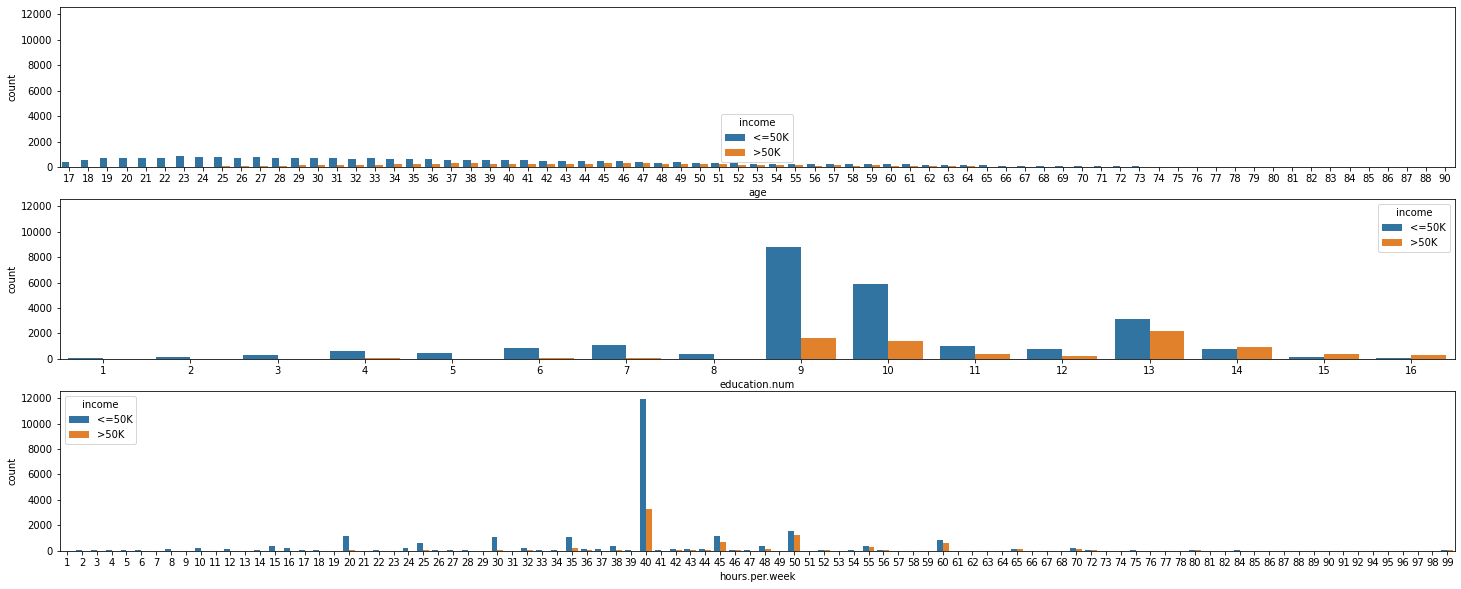

In [78]:
# graphs of numerical attributes
fig, axes = plt.subplots(3, 1, figsize = (25,10), sharey = True)
sns.countplot(ax = axes[0], x = 'age', hue = 'income', data = adult)
sns.countplot(ax = axes[1], x = 'education.num', hue = 'income', data = adult)
sns.countplot(ax = axes[2], x = 'hours.per.week', hue = 'income', data = adult)
plt.show()

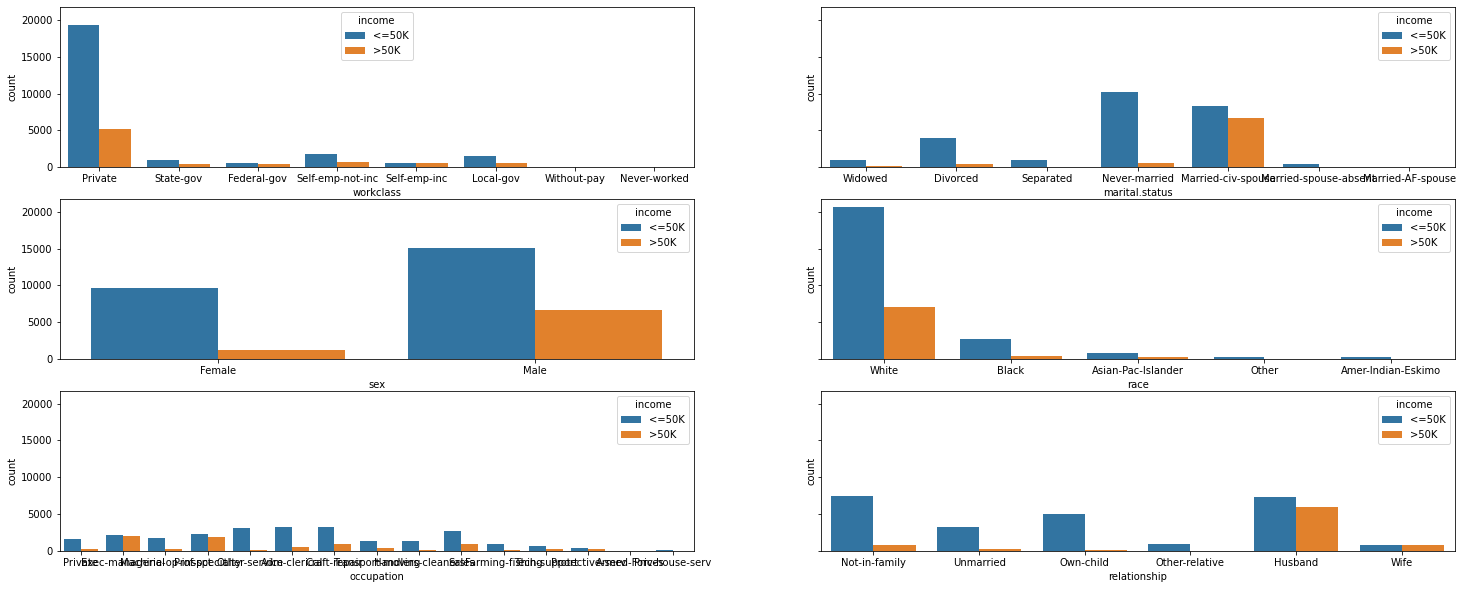

In [79]:
# plots of categorical attributes
fig, axes = plt.subplots(3, 2, figsize = (25,10), sharey = True)
sns.countplot(ax = axes[0,0], x = 'workclass', hue = 'income', data = adult)
sns.countplot(ax = axes[0,1], x = 'marital.status', hue = 'income', data = adult)
sns.countplot(ax = axes[1,0], x = 'sex', hue = 'income', data = adult)
sns.countplot(ax = axes[1,1], x = 'race', hue = 'income', data = adult)
sns.countplot(ax = axes[2,0], x = 'occupation', hue = 'income', data = adult)
sns.countplot(ax = axes[2,1], x = 'relationship', hue = 'income', data = adult)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa4b69e0d0>]],
      dtype=object)

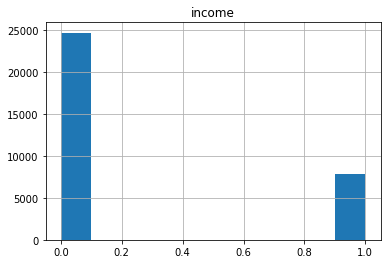

In [89]:
# Income column distribution
adult.hist(column = 'income')

In [18]:
adult['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [21]:
adult['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [122]:
adult['marital.status'].unique()

array([0, 1])

In [123]:
adult['occupation'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [141]:
adult['relationship'].unique()

array([0, 1, 2, 3, 4, 5])

In [24]:
adult['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [25]:
adult['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
adult['native.country'].unique()

array(['United-States', 'Private', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [88]:
adult['workclass'] = adult['workclass'].replace({'Private': 0, 'State-gov': 1, 'Federal-gov': 2, 'Self-emp-not-inc': 3, 'Self-emp-inc': 4,
                                                 'Local-gov': 5, 'Without-pay': 6, 'Never-worked': 7})
adult['education'] = adult['education'].replace({'HS-grad': 0, 'Some-college': 1, '7th-8th': 2, '10th': 3, 'Doctorate': 4, 'Prof-school':5,
                                                 'Bachelors': 6, 'Masters': 7, '11th': 8, 'Assoc-acdm': 9, 'Assoc-voc': 10, '1st-4th': 11,
                                                 '5th-6th': 12, '12th': 13, '9th': 14, 'Preschool': 15})
adult['marital.status'] = adult['marital.status'].replace({'Widowed': 0, 'Divorced': 0, 'Separated': 0, 'Never-married': 0, 'Married-civ-spouse': 1,
                                                           'Married-spouse-absent': 1, 'Married-AF-spouse': 1})
adult['occupation'] = adult['occupation'].replace({'Private':0, 'Exec-managerial': 1, 'Machine-op-inspct': 2, 'Prof-specialty':3, 'Other-service': 4,
                                                   'Adm-clerical': 5, 'Craft-repair': 6, 'Transport-moving': 7, 'Handlers-cleaners': 8, 'Sales': 9,
                                                   'Farming-fishing': 10, 'Tech-support': 11, 'Protective-serv': 12, 'Armed-Forces': 13,
                                                   'Priv-house-serv': 14})
adult['relationship'] = adult['relationship'].replace({'Not-in-family': 0, 'Unmarried': 1, 'Own-child': 2, 'Other-relative': 3, 'Husband': 4, 'Wife': 5})
adult['race'] = adult['race'].replace({'White': 0, 'Black': 1, 'Asian-Pac-Islander': 2, 'Other': 3,'Amer-Indian-Eskimo': 4})
adult['sex'] = adult['sex'].replace({'Female': 0, 'Male': 1})
adult['native.country'] = adult['native.country'].replace({'United-States': 0, 'Private': 1, 'Mexico': 2, 'Greece': 3, 'Vietnam': 4, 'China': 5,
                                                           'Taiwan':6, 'India':7, 'Philippines':8, 'Trinadad&Tobago':9, 'Canada':10, 'South':11,
                                                           'Holand-Netherlands': 12, 'Puerto-Rico': 13, 'Poland': 14, 'Iran': 15, 'England': 16, 
                                                           'Germany': 17, 'Italy': 18, 'Japan': 19, 'Hong': 20, 'Honduras': 21, 'Cuba': 22, 
                                                           'Ireland': 23, 'Cambodia': 24, 'Peru':25, 'Nicaragua': 26, 'Dominican-Republic': 27, 
                                                           'Haiti': 28, 'El-Salvador': 29, 'Hungary': 30, 'Columbia': 31, 'Guatemala': 32, 'Jamaica': 33,
                                                           'Ecuador': 34 , 'France': 35 , 'Yugoslavia': 36 , 'Scotland': 37 , 'Portugal': 38 , 'Laos': 39,
                                                           'Thailand': 40, 'Outlying-US(Guam-USVI-etc)': 41})
adult['income'] = adult['income'].replace({'<=50K': 0, '>50K': 1})

In [50]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,0,77053,0,9,0,0,0,0,0,40,0,0
1,82,0,132870,0,9,0,1,0,0,0,18,0,0
2,66,0,186061,1,10,0,0,1,1,0,40,0,0
3,54,0,140359,2,4,0,2,1,0,0,40,0,0
4,41,0,264663,1,10,0,3,2,0,0,40,0,0


In [91]:
#Spliting training and testing partitions
X = adult.drop(['income'],axis = 1)
y = adult['income']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26048, 14)
(26048,)
(6513, 14)
(6513,)


In [96]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(random_state = 0)
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred = logModel.predict(X_test)

from sklearn import metrics
logAccuracy = metrics.accuracy_score(y_test, y_pred)
print(logAccuracy)

0.7865806847842776


In [113]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtModel = DecisionTreeClassifier(criterion='entropy')
dtModel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
y_pred = dtModel.predict((X_test))
dtAccuracy = metrics.accuracy_score(y_test, y_pred)
print(dtAccuracy)

0.8159066482419776


In [115]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfcModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [116]:
y_pred = rfcModel.predict(X_test)
rfcAccuracy = metrics.accuracy_score(y_test, y_pred)
print(rfcAccuracy)

In [117]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbcModel = GradientBoostingClassifier(random_state=42)
gbcModel.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [118]:
y_pred = gbcModel.predict(X_test)
gbcAccuracy = metrics.accuracy_score(y_test, y_pred)
print(gbcAccuracy)

In [124]:
models_scores = pd.DataFrame({'Accuracy':[logAccuracy, dtAccuracy, rfcAccuracy, gbcAccuracy]},
                             index = ['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting'])

models_scores

,Accuracy
Logistic Regression,0.786581
Decision Tree,0.815907
Random Forest,0.855213
Gradient Boosting,0.866114


In [128]:
#install optuna
!pip install --quiet optuna

     |████████████████████████████████| 296kB 7.3MB/s 
     |████████████████████████████████| 1.2MB 7.7MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 112kB 28.5MB/s 
     |████████████████████████████████| 143kB 18.6MB/s 


In [144]:
# Tuning parameters
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import optuna

def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log = True))
    
    gbc = sklearn.ensemble.GradientBoostingClassifier(
        n_estimators=n_estimators, max_depth=max_depth)
    
    return metrics.accuracy_score(y_test, y_pred)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-05-08 05:46:16,551] A new study created in memory with name: no-name-c8eb5b64-a463-4099-81c7-d28950387bf0
[I 2021-05-08 05:46:16,559] Trial 0 finished with value: 0.8661139259941655 and parameters: {'n_estimators': 8, 'max_depth': 11.754432307225077}. Best is trial 0 with value: 0.8661139259941655.
[I 2021-05-08 05:46:16,565] Trial 1 finished with value: 0.8661139259941655 and parameters: {'n_estimators': 20, 'max_depth': 1.0790270908981119}. Best is trial 0 with value: 0.8661139259941655.
[I 2021-05-08 05:46:16,570] Trial 2 finished with value: 0.8661139259941655 and parameters: {'n_estimators': 16, 'max_depth': 11.562755922760502}. Best is trial 0 with value: 0.8661139259941655.
[I 2021-05-08 05:46:16,576] Trial 3 finished with value: 0.8661139259941655 and parameters: {'n_estimators': 3, 'max_depth': 2.069663360681698}. Best is trial 0 with value: 0.8661139259941655.
[I 2021-05-08 05:46:16,580] Trial 4 finished with value: 0.8661139259941655 and parameters: {'n_estimators': 

Accuracy: 0.8661139259941655
Best hyperparameters: {'n_estimators': 8, 'max_depth': 11.754432307225077}


In [147]:
# important features
feature_importances = gbcModel.feature_importances_
features = X_train.columns
df = pd.DataFrame({'Features': features, 'Importance': feature_importances}).nlargest(10, 'Importance')
print(df)

          Features  Importance
7     relationship    0.387428
10    capital.gain    0.211737
4    education.num    0.202859
0              age    0.059260
11    capital.loss    0.059041
12  hours.per.week    0.038624
6       occupation    0.020671
5   marital.status    0.006907
2           fnlwgt    0.004529
9              sex    0.003059
